In [ ]:
folder = "/home/yad2/sarpixeltracking/reference_20100621_tiled__secondary_20110802_tiled_vmap_minm_35px_spm2"

import os
from glob import glob


In [30]:
import cartopy.crs as ccrs

from osgeo import gdal, osr

import numpy as np

gdal.UseExceptions()


fname="/home/yad2/sarpixeltracking/reference_amp/reference_amp.tif" 

# fname = F_file

ds = gdal.Open(fname)
source_data = ds.GetRasterBand(1).ReadAsArray()
lat_data = ds.GetRasterBand(2).ReadAsArray()
lon_data = ds.GetRasterBand(3).ReadAsArray()

ds=None

# fname = F_file

# ds = gdal.Open("/home/yad2/sarpixeltracking/geometry_tif/lat.tif")
# lat_data = ds.GetRasterBand(1).ReadAsArray()
# ds=None


# fname="/home/yad2/sarpixeltracking/geometry_tif/lon.tif"

# # fname = F_file

# ds = gdal.Open(fname)
# lon_data = ds.GetRasterBand(1).ReadAsArray()
# ds=None

# gt = ds.GetGeoTransform()
# proj = ds.GetProjection()

# inproj = osr.SpatialReference()
# inproj.ImportFromWkt(proj)

# if str(inproj).startswith("PROJCS"):
#     projcs = inproj.GetAuthorityCode('PROJCS')
# elif str(inproj).startswith("GEOGCS"):
#     projcs = inproj.GetAuthorityCode('GEOGCS')

# print(projcs)
# file_projection = ccrs.epsg(projcs)
# print(file_projection)

# file_extent = (gt[0], gt[0] + ds.RasterXSize * gt[1],
#           gt[3] + ds.RasterYSize * gt[5], gt[3])



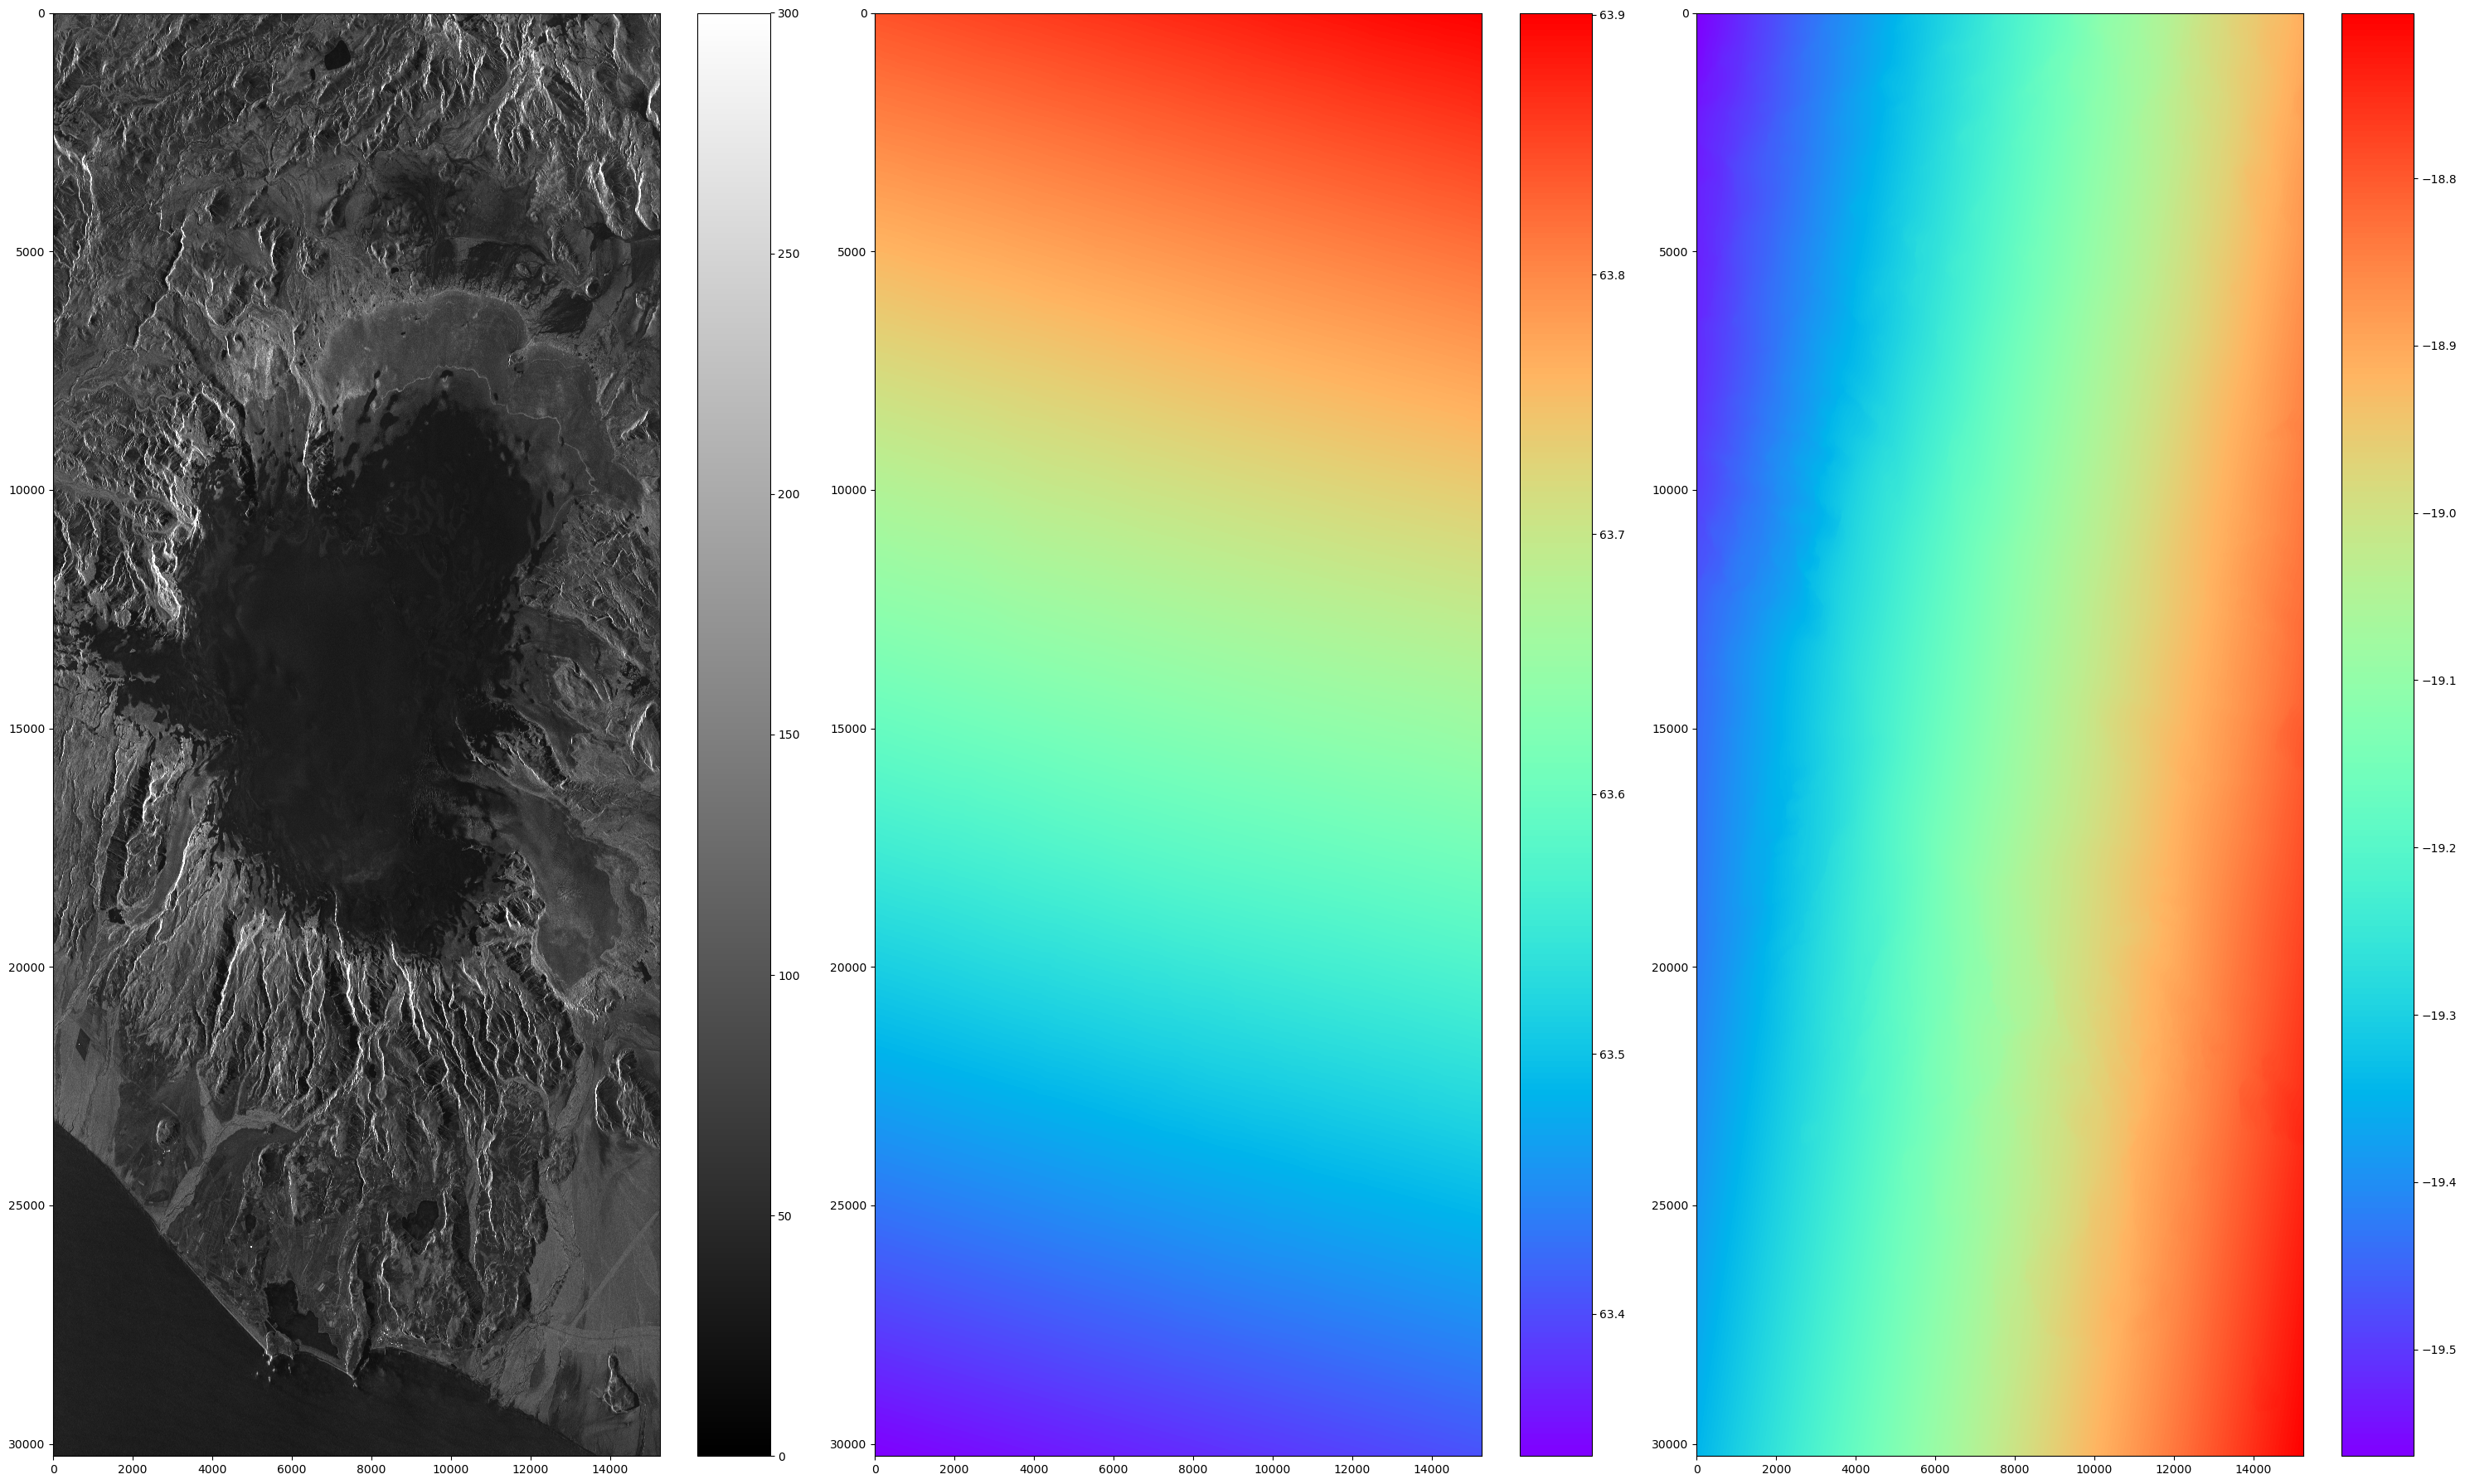

In [31]:
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(30, 18))

fr = fig.add_subplot(1,3,1)

im = fr.imshow(source_data, cmap='gray', vmax=300, aspect='auto')

fig.colorbar(im, ax=fr)

fr = fig.add_subplot(1,3,2)

im = fr.imshow(lon_data, cmap='rainbow', aspect='auto')

fig.colorbar(im, ax=fr)

fr = fig.add_subplot(1,3,3)

im = fr.imshow(lat_data, cmap='rainbow', aspect='auto')

fig.colorbar(im, ax=fr)

fig.tight_layout()

plt.show()


In [26]:
from rasterio import warp
from rasterio.crs import CRS
from rasterio.transform import AffineTransformer

dest_data = warp.reproject(source_data, src_geoloc_array=(lon_data, lat_data), src_crs=CRS.from_epsg(4326), dst_crs=CRS.from_epsg(4326))

AttributeError: 'NoneType' object has no attribute 'xoff'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


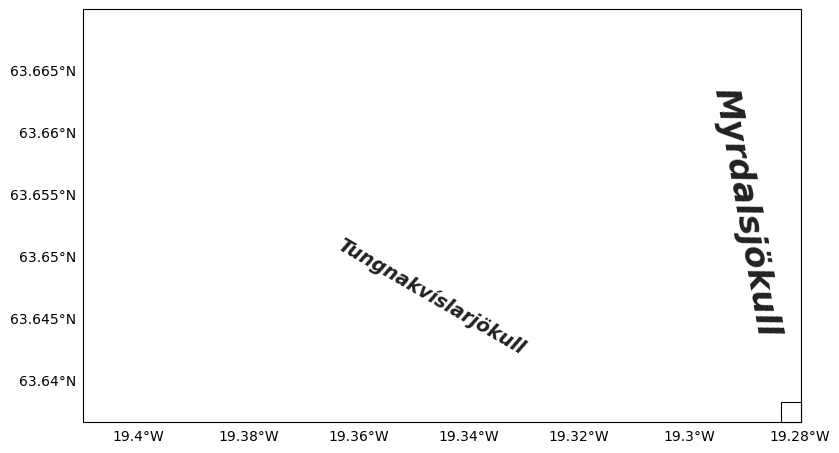

In [20]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show
import matplotlib.patheffects as path_effects


# plt.rc('font', family='Helvetica')



Skriða_extent = [-19.28, -19.41, 63.637, 63.67]


projection = ccrs.Mercator()

fig = figure(figsize=(8.5,10))
fr = fig.add_subplot(1,1,1, projection=file_projection)

fr.set_extent(Skriða_extent)

# fr.add_wms(wms='https://gis.lmi.is/geoserver/wms?request=GetCapabilities&service=WMS',
#                layers=["IS_50V:strandlina_flakar", 'IS_50V:vatnafar_flakar']) #"IS_50V:vatnafar_linur" 'IS_50V:samgongur_linur'



gl = fr.gridlines(draw_labels=True, dms=False, x_inline=False, y_inline=False)

gl.top_labels = False
gl.right_labels = False
gl.xlines = False
gl.ylines = False

fr.imshow(data[:, :],  vmax=300, cmap='gray', extent=file_extent,
          origin='upper', transform=file_projection)

# fr.plot(headscarp["x"].values, headscarp["y"].values, 
#         lw=1.5, color="firebrick", 
#         path_effects=[path_effects.withTickedStroke(angle=-90, spacing=9, length=0.5)],
#         transform=ccrs.Geodetic(), label="headscarp")

# fr.fill(np.flip(Landslide_extent["x"].values), np.flip(Landslide_extent["y"].values), 
#         color="firebrick", alpha=0.1, lw=1, edgecolor="black",
#         transform=ccrs.Geodetic(), label="approximate extent of the landslide")

fr.text(-19.29, 63.654,
        "Myrdalsjökull", horizontalalignment='center', verticalalignment='center', color="black", alpha=.87, rotation=-80, 
        fontsize=24, fontweight="bold", fontstyle="italic", 
        transform=ccrs.Geodetic())

fr.text(-19.347, 63.647,
        "Tungnakvíslarjökull", horizontalalignment='center', verticalalignment='center', color="black", alpha=.87, rotation=-30, 
        fontsize=14, fontweight="bold", fontstyle="italic", 
        transform=ccrs.Geodetic())




# gpsstations =  fr.scatter(gps_locations["lon"], gps_locations["lat"],
#                                 marker=7, color="firebrick", s=100, path_effects=[path_effects.withStroke(linewidth=3, foreground='white'), path_effects.Normal()],
#                                 label="GPS stations",
#                                 transform=ccrs.Geodetic())

# for i, stationname in enumerate(gps_locations["name"].values):
#         if gps_locations["lat"][i] < Skriða_extent[3] and gps_locations["lat"][i] > Skriða_extent[2] and gps_locations["lon"][i] < Skriða_extent[0] and gps_locations["lon"][i] > Skriða_extent[1]:
#                 fr.annotate(str(stationname), (gps_locations["lon"][i], gps_locations["lat"][i]),
#                                 color='black', fontsize=8, fontweight="bold", path_effects=[path_effects.withStroke(linewidth=2, foreground='white'),
#                                                                                             path_effects.Normal()],
#                                 ha="center", xytext=(0, 9), textcoords='offset points',
#                                 transform=ccrs.Geodetic())


legend = fr.legend(loc="lower right", framealpha=1, fancybox=False, edgecolor="black", borderaxespad=0, 
                   fontsize="9", borderpad=0.8, labelspacing=0.8)
legend.get_frame().set_linewidth(0.8)

# extent = [-18.9, -19.6, 63.526, 63.75]

# a = fr.get_position()

# inset_fr = fr.inset_axes([-0.025, 0, 0.25,0.25], projection=projection, extent=extent, 
#                         xticks=[], yticks=[])

# patchify_xyfile(inset_fr, "../coastline.xy", 
#             facecolor=to_rgba("black", 0), edgecolor=to_rgba("grey", 1), lw=0.8,
#             zorder=0, 
#             transform=ccrs.Geodetic())

# patchify_xyfile(inset_fr, "../joklar.xy", 
#             facecolor=to_rgba("black", 0), edgecolor=to_rgba("grey", 0.7), lw=1,
#             zorder=0,
#             transform=ccrs.Geodetic())

# inset_fr.plot([Skriða_extent[0], Skriða_extent[1], Skriða_extent[1], Skriða_extent[0], Skriða_extent[0]],
#          [Skriða_extent[2], Skriða_extent[2], Skriða_extent[3], Skriða_extent[3], Skriða_extent[2]],
#         color="black", linewidth=1.2,
#         transform=ccrs.Geodetic())



fig.tight_layout()

# fig.savefig("TungKvJokull_OverviewFigure.png", dpi=300, bbox_inches='tight')

plt.show()
